<a href="https://colab.research.google.com/github/YoneJ/Final/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

### Code modify

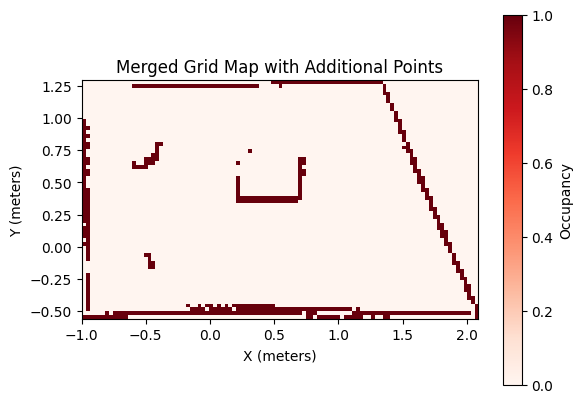

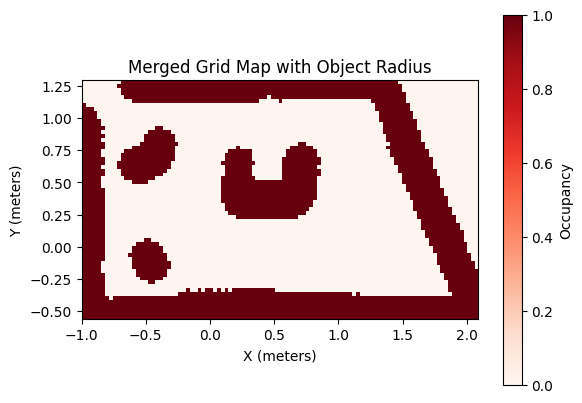

(33, 18)


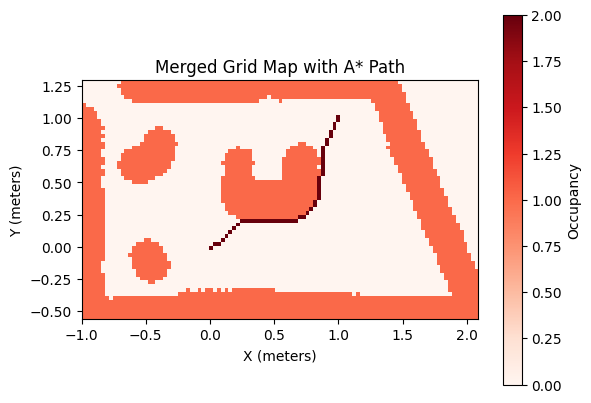

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import heapq

import numpy as np
import pandas as pd

# Load data
df1 = pd.read_csv('usdata.csv')
df2 = pd.read_csv('usdata2.csv')

x1, y1 = df1['x'].values, df1['y'].values
x2, y2 = df2['x'].values, df2['y'].values

# Transformation parameters for data2
translation_vector_2 = np.array([1.0, 0.0])  # Shift data2 x-coordinate to the left by 1 unit

# Apply the translation to data2
transformed_x2 = x2 + translation_vector_2[0]
transformed_y2 = y2 + translation_vector_2[1]

# Combine all points into a single dataset
all_x = np.concatenate((x1, transformed_x2))
all_y = np.concatenate((y1, transformed_y2))

x_min, x_max = np.min(all_x), np.max(all_x)
y_min, y_max = np.min(all_y), np.max(all_y)

# Define the grid resolution
resolution = 0.03  # Size of each grid cell in meters

# Calculate grid dimensions based on bounds and resolution
grid_width = int(np.ceil((x_max - x_min) / resolution))
grid_height = int(np.ceil((y_max - y_min) / resolution))

# Initialize the grid map with zeros (free space)
grid_map = np.zeros((grid_height, grid_width))


# Helper function to convert coordinates to grid indices
def to_grid_indices(x, y, x_min, y_min, resolution):
    grid_x = int((x - x_min) / resolution)
    grid_y = int((y - y_min) / resolution)
    return grid_x, grid_y

for x, y in zip(all_x, all_y):
    grid_x, grid_y = to_grid_indices(x, y, x_min, y_min, resolution)
    if 0 <= grid_x < grid_width and 0 <= grid_y < grid_height:
      grid_map[grid_y, grid_x] = 1  # Mark as occupied

# Helper function to mark cells as occupied
def mark_cells(grid_map, x_points, y_points, x_min, y_min, resolution):
    for x, y in zip(x_points, y_points):
        grid_x, grid_y = to_grid_indices(x, y, x_min, y_min, resolution)
        if 0 <= grid_x < grid_map.shape[1] and 0 <= grid_y < grid_map.shape[0]:
            grid_map[grid_y, grid_x] = 1  # Mark as occupied


# Mark existing points on the grid map
mark_cells(grid_map, all_x, all_y, x_min, y_min, resolution)

# Example: Add a rectangular region (x, y) = (0.3, 0.75) to (0.75, 0.75)
x_start, x_end = 0.3, 0.75
y_start, y_end = 0.75, 0.75

# Generate a range of points within the specified region
x_points = np.linspace(x_start, x_end, int((x_end - x_start) / resolution) + 1)
y_points = np.linspace(y_start, y_end, int((y_end - y_start) / resolution) + 1)

# Mark new points on the grid map
mark_cells(grid_map, x_points, y_points, x_min, y_min, resolution)

# Visualize the merged grid map
plt.imshow(grid_map, cmap='Reds', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.title("Merged Grid Map with Additional Points")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.colorbar(label="Occupancy")
plt.show()

# Function to mark cells within a given radius as occupied
def mark_occupied(grid_map, grid_x, grid_y, radius, resolution):
    radius_in_cells = int(np.ceil(radius / resolution))
    for dx in range(-radius_in_cells, radius_in_cells + 1):
        for dy in range(-radius_in_cells, radius_in_cells + 1):
            if dx**2 + dy**2 <= radius_in_cells**2:
                nx, ny = grid_x + dx, grid_y + dy
                if 0 <= nx < grid_map.shape[1] and 0 <= ny < grid_map.shape[0]:
                    grid_map[ny, nx] = 1

# Extend the occupied cells to account for the object radius
object_radius = 0.1  # Radius of the object in meters
for x, y in zip(all_x, all_y):
    grid_x, grid_y = to_grid_indices(x, y, x_min, y_min, resolution)
    if 0 <= grid_x < grid_width and 0 <= grid_y < grid_height:
        mark_occupied(grid_map, grid_x, grid_y, object_radius, resolution)

# Visualize the grid map with occupied cells extended
plt.imshow(grid_map, cmap='Reds', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.title("Merged Grid Map with Object Radius")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.colorbar(label="Occupancy")
plt.show()

np.save('map4.npy', grid_map)
# Define A* algorithm for pathfinding
def astar(grid_map, start, goal):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    open_set = []
    heapq.heappush(open_set, (0, start))
    g_costs = {start: 0}
    f_costs = {start: heuristic(start, goal)}
    came_from = {}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            return reconstruct_path(came_from, current)

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if not (0 <= neighbor[0] < grid_map.shape[1] and 0 <= neighbor[1] < grid_map.shape[0]):
                continue
            if grid_map[neighbor[1], neighbor[0]] == 1:
                continue

            tentative_g_cost = g_costs[current] + (1.414 if direction[0] != 0 and direction[1] != 0 else 1)

            if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                came_from[neighbor] = current
                g_costs[neighbor] = tentative_g_cost
                f_costs[neighbor] = tentative_g_cost + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_costs[neighbor], neighbor))

    return None

def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

# Define start and goal positions in grid coordinates
start = to_grid_indices(0.0, 0.0, x_min, y_min, resolution)
goal = to_grid_indices(1.0, 1.0, x_min, y_min, resolution)

print(to_grid_indices(0,0,x_min,y_min,resolution))

# Run A* algorithm
path = astar(grid_map, start, goal)

np.save("path7.npy", np.array(path))

# Plot the grid map and the path
if path:
    for (x, y) in path:
        grid_map[y, x] = 2  # Mark the path with a different value

    plt.imshow(grid_map, cmap='Reds', origin='lower', extent=[x_min, x_max, y_min, y_max])
    plt.title("Merged Grid Map with A* Path")
    plt.xlabel("X (meters)")
    plt.ylabel("Y (meters)")
    plt.colorbar(label="Occupancy")
    plt.show()
else:
    print("No path found from start to goal.")

print(grid_map)

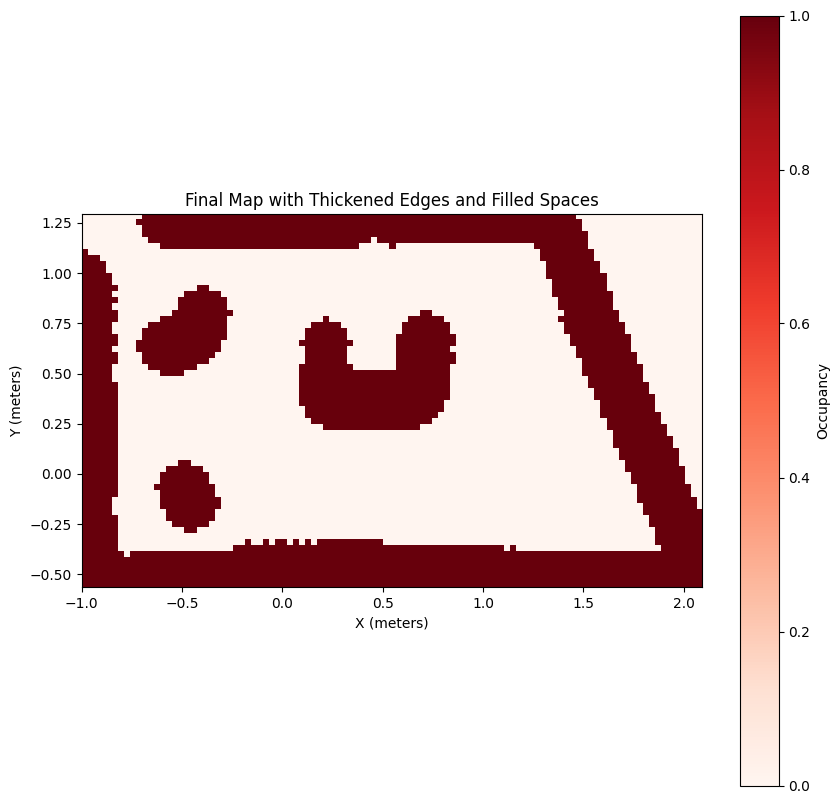

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_fill_holes

# Load data from files
df1 = pd.read_csv('usdata.csv')
df2 = pd.read_csv('usdata2.csv')

x1, y1 = df1['x'].values, df1['y'].values
x2, y2 = df2['x'].values, df2['y'].values

# Transformation parameters for data2
translation_vector_2 = np.array([1.0, 0.0])  # Shift data2 x-coordinate to the left by 1 unit

# Apply the translation to data2
transformed_x2 = x2 + translation_vector_2[0]
transformed_y2 = y2 + translation_vector_2[1]

# Combine all points into a single dataset
all_x = np.concatenate((x1, transformed_x2))
all_y = np.concatenate((y1, transformed_y2))

# Determine the bounds of the grid
x_min, x_max = np.min(all_x), np.max(all_x)
y_min, y_max = np.min(all_y), np.max(all_y)

# Define the grid resolution
resolution = 0.03  # Size of each grid cell in meters

# Calculate grid dimensions based on bounds and resolution
grid_width = int(np.ceil((x_max - x_min) / resolution))
grid_height = int(np.ceil((y_max - y_min) / resolution))

# Initialize the grid map with zeros (free space)
grid_map = np.zeros((grid_height, grid_width))

# Helper function to convert coordinates to grid indices
def to_grid_indices(x, y, x_min, y_min, resolution):
    grid_x = int((x - x_min) / resolution)
    grid_y = int((y - y_min) / resolution)
    return grid_x, grid_y

# Populate the grid map with points from all slices
for x, y in zip(all_x, all_y):
    grid_x, grid_y = to_grid_indices(x, y, x_min, y_min, resolution)
    if 0 <= grid_x < grid_width and 0 <= grid_y < grid_height:
        grid_map[grid_y, grid_x] = 1  # Mark as occupied

# Add a filled line to connect two points
line_x = np.linspace(0.33, 0.898, num=50)
line_y = np.full_like(line_x, -0.66)

# Populate the map with the connecting line
for x, y in zip(line_x, line_y):
    grid_x, grid_y = to_grid_indices(x, y, x_min, y_min, resolution)
    if 0 <= grid_x < grid_width and 0 <= grid_y < grid_height:
        grid_map[grid_y, grid_x] = 1

# Function to thicken edges
def thicken_edges(grid_map, radius, resolution):
    radius_in_cells = int(np.ceil(radius / resolution))
    thickened_map = grid_map.copy()

    for y in range(grid_map.shape[0]):
        for x in range(grid_map.shape[1]):
            if grid_map[y, x] == 1:  # If the cell is occupied
                for dx in range(-radius_in_cells, radius_in_cells + 1):
                    for dy in range(-radius_in_cells, radius_in_cells + 1):
                        if dx**2 + dy**2 <= radius_in_cells**2:  # Check within the radius
                            nx, ny = x + dx, y + dy
                            if 0 <= nx < grid_map.shape[1] and 0 <= ny < grid_map.shape[0]:
                                thickened_map[ny, nx] = 1
    return thickened_map

# Thicken the edges
edge_thickness = 0.1  # Thickness in meters
thickened_map = thicken_edges(grid_map, edge_thickness, resolution)

# Fill inner spaces within obstacles
filled_map = binary_fill_holes(thickened_map).astype(int)

# Visualize the final map
plt.figure(figsize=(10, 10))
plt.imshow(filled_map, cmap='Reds', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.title("Final Map with Thickened Edges and Filled Spaces")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.colorbar(label="Occupancy")
plt.show()

In [128]:
import numpy as np

# Replace 'file_path.npy' with the path to your .npy file
file_path = 'map1012.npy'

# Load the .npy file
data = np.load(file_path)

# Print the loaded data to verify
print(data)


[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

### Code dang sua

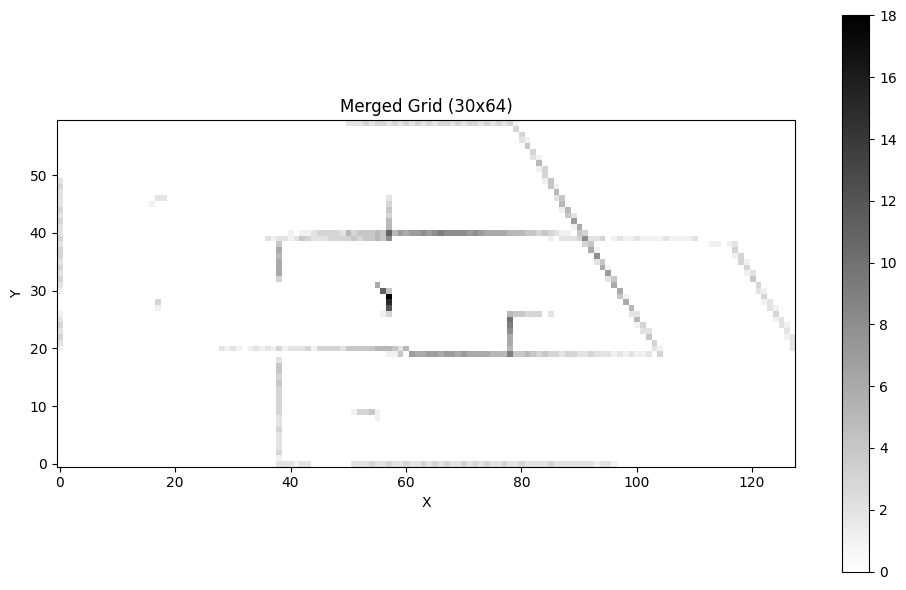

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def process_data_from_dataframe(df):
    x = df['x'].values
    y = df['y'].values
    x_grid = np.clip(np.floor((x - min(x)) / (max(x) - min(x)) * 128), 0, 127).astype(int)
    y_grid = np.clip(np.floor((y - min(y)) / (max(y) - min(y)) * 60), 0, 59).astype(int)
    grid = np.zeros((60, 128))

    for i in range(len(x_grid)):
        grid[y_grid[i], x_grid[i]] += 1

    return grid

# File list for merging
files = [
    'usdata1.csv',
    'usdata2.csv'
]

# Merge the files
dfs = [pd.read_csv(file) for file in files]
merged_df = pd.concat(dfs, ignore_index=True)

# Process the merged data
grid = process_data_from_dataframe(merged_df)

# Plot the merged grid
fig, ax = plt.subplots(figsize=(10, 6))
norm = Normalize(vmin=0, vmax=np.max(grid))
cax = ax.imshow(grid, cmap='binary', origin='lower', interpolation='nearest', norm=norm)
ax.set_title('Merged Grid (30x64)')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Add color bar
fig.colorbar(cax, ax=ax, orientation='vertical')

plt.tight_layout()
plt.show()


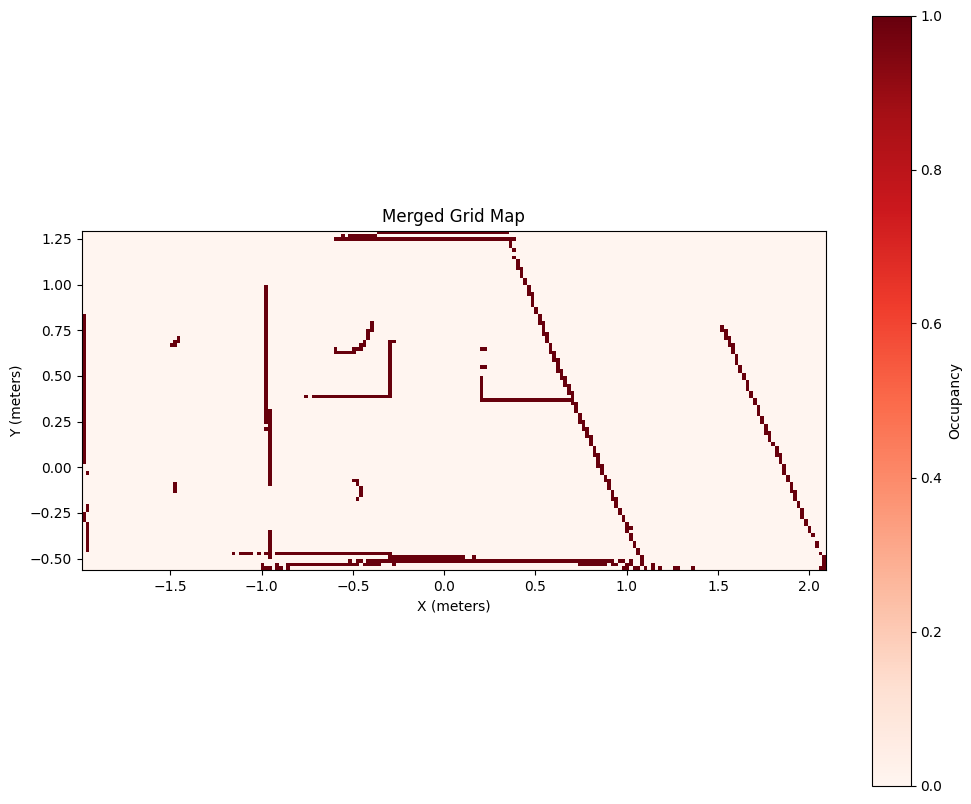

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def process_data_from_dataframes(df1, df2):
    # Combine the data from both DataFrames
    combined_df = pd.concat([df1, df2], ignore_index=True)

    # Get the minimum and maximum bounds for x and y
    x_min, x_max = combined_df['x'].min(), combined_df['x'].max()
    y_min, y_max = combined_df['y'].min(), combined_df['y'].max()

    # Define the grid resolution
    resolution = 0.02  # Size of each grid cell in meters

    # Calculate grid dimensions based on bounds and resolution
    grid_width = int(np.ceil((x_max - x_min) / resolution))
    grid_height = int(np.ceil((y_max - y_min) / resolution))

    # Initialize the grid map with zeros (free space)
    grid_map = np.zeros((grid_height, grid_width))

    # Helper function to convert coordinates to grid indices
    def to_grid_indices(x, y, x_min, y_min, resolution):
        grid_x = int((x - x_min) / resolution)
        grid_y = int((y - y_min) / resolution)
        return grid_x, grid_y

    # Populate the grid map with points from the combined DataFrame
    for x, y in zip(combined_df['x'], combined_df['y']):
        grid_x, grid_y = to_grid_indices(x, y, x_min, y_min, resolution)
        if 0 <= grid_x < grid_width and 0 <= grid_y < grid_height:
            grid_map[grid_y, grid_x] = 1  # Mark as occupied

    return grid_map, x_min, x_max, y_min, y_max

# Load data from two CSV files
file_name1 = 'usdata.csv'  # Replace with the path to your first CSV file
file_name2 = 'usdata2.csv'  # Replace with the path to your second CSV file

# Read the CSV files into DataFrames
df1 = pd.read_csv(file_name1)
df2 = pd.read_csv(file_name2)

# Process the data from both DataFrames and create the grid map
grid_map, x_min, x_max, y_min, y_max = process_data_from_dataframes(df1, df2)

# Visualize the grid map
plt.figure(figsize=(12, 10))
plt.imshow(grid_map, cmap='Reds', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.title("Merged Grid Map")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.colorbar(label="Occupancy")
plt.show()


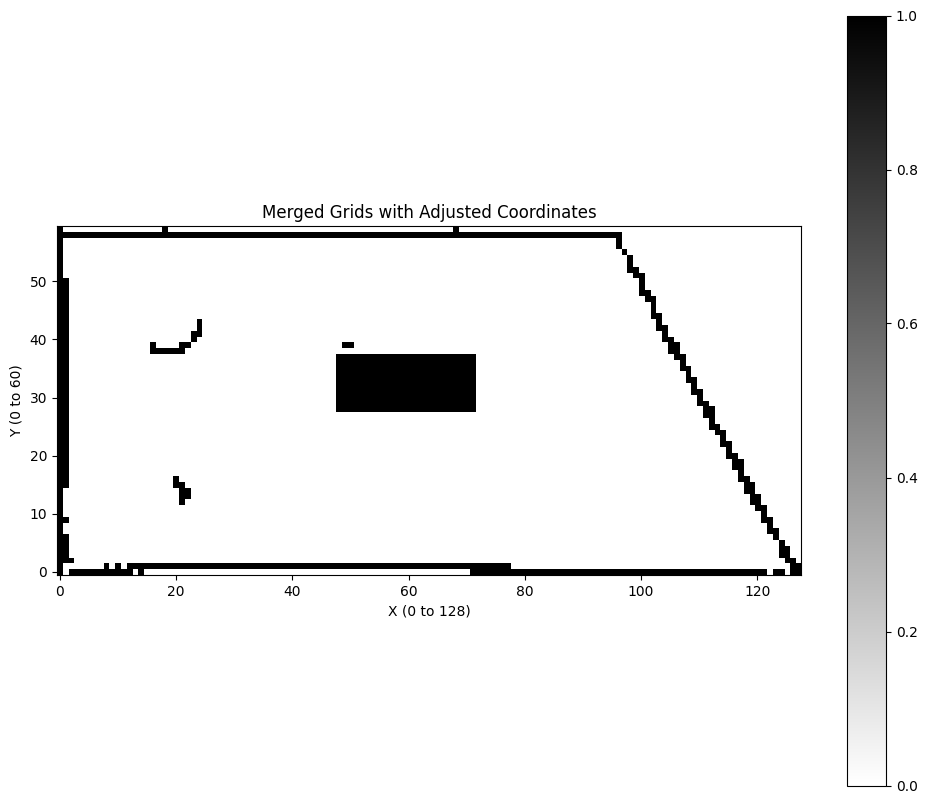

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def process_data(file_name, grid_width, grid_height, resolution=0.02):
    df = pd.read_csv(file_name)
    x = df['x'].values
    y = df['y'].values

    # Get the minimum and maximum bounds for x and y
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()

    # Normalize coordinates to the grid size (0 to grid_width - 1, 0 to grid_height - 1)
    x_grid = np.clip(((x - x_min) / (x_max - x_min) * (grid_width - 1)).astype(int), 0, grid_width - 1)
    y_grid = np.clip(((y - y_min) / (y_max - y_min) * (grid_height - 1)).astype(int), 0, grid_height - 1)

    # Initialize the grid with zeros (free space)
    grid = np.zeros((grid_height, grid_width), dtype=int)

    # Populate the grid with points from the DataFrame
    for i in range(len(x_grid)):
        grid[y_grid[i], x_grid[i]] = 1  # Mark as occupied

    return grid

# Define the grid dimensions and resolution
grid_width = 128
grid_height = 60
resolution = 0.02

# Load data from the CSV files and create the merged grid
files = ['usdata.csv', 'usdata2.csv']
merged_grid = np.zeros((grid_height, grid_width))

for file in files:
    grid = process_data(file, grid_width, grid_height, resolution)
    merged_grid = np.maximum(merged_grid, grid)

# Additional manual filling, if needed (same as in your original code)
merged_grid[0:60, 0] = 1  # Fill y = 0 to 29 at x = 0
merged_grid[58, 0:82] = 1  # Fill x = 0 to 40 at y = 29
merged_grid[28:38, 48:72] = 1  # Fill x = 24 to 35, y = 14 to 18
merged_grid[40, 50] = 0
merged_grid[38, 70] = 0
merged_grid[39, 70] = 0

# Visualize the merged grid
plt.figure(figsize=(12, 10))
plt.imshow(merged_grid, cmap='binary', interpolation='nearest')  # Set 'upper' to count y upwards
plt.title('Merged Grids with Adjusted Coordinates')
plt.xlabel('X (0 to {})'.format(grid_width))
plt.ylabel('Y (0 to {})'.format(grid_height))
plt.gca().invert_yaxis()  # Invert the y-axis direction for correct orientation
plt.colorbar(orientation='vertical')
plt.show()

# Save the merged grid to a file
np.save('merged_grid_simu.npy', merged_grid)


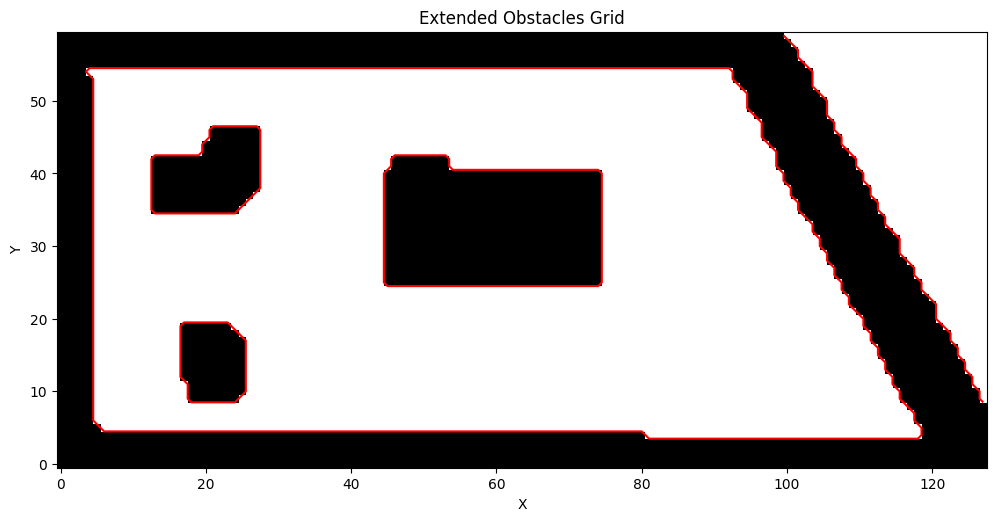

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation


def extend_obstacles(grid, obstacle_value=1, extension_size=1):
    # Create a binary obstacle map
    obstacle_map = (grid == obstacle_value)

    # Define a structuring element for morphological dilation (square neighborhood)
    structuring_element = np.ones((2 * extension_size + 1, 2 * extension_size + 1))

    # Perform binary morphological dilation
    extended_obstacle_map = binary_dilation(obstacle_map, structure=structuring_element)

    # Map the extended obstacle map back to the original obstacle value
    extended_grid = np.where(extended_obstacle_map, obstacle_value, 0)

    return extended_grid


# Example usage:
extended_grid = extend_obstacles(merged_grid, obstacle_value=1, extension_size=3)

# Visualization
plt.figure(figsize=(12, 10))
plt.imshow(extended_grid, cmap='binary', interpolation='nearest', origin='lower')
plt.title('Extended Obstacles Grid')
plt.xlabel('X')
plt.ylabel('Y')


plt.contour(extended_grid, levels=[0.5], colors='red')  # Add a red boundary
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

plt.show()
print(extended_grid)

np.save('map_test_2.npy', extended_grid)


In [60]:
import numpy as np
import heapq

DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, -1), (-1, 1)]

def heuristic(a, b):
    """Calculate the Manhattan distance (L1 norm) between two points."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, end):
    open_list = []
    closed_list = set()

    start_x, start_y = start
    end_x, end_y = end

    g_cost = {start: 0}
    f_cost = {start: heuristic(start, end)}
    parents = {start: None}

    heapq.heappush(open_list, (f_cost[start], start))

    while open_list:
        current_f, current_node = heapq.heappop(open_list)
        current_x, current_y = current_node

        if current_node == end:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parents[current_node]
            return path[::-1]

        closed_list.add(current_node)

        for dx, dy in DIRECTIONS:
            neighbor = (current_x + dx, current_y + dy)

            if not (0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]):
                continue
            if grid[neighbor[0], neighbor[1]] == 1:
                continue
            if neighbor in closed_list:
                continue

            tentative_g = g_cost[current_node] + 1
            h_cost = heuristic(neighbor, end)
            f_cost_value = tentative_g + h_cost

            # Print the costs (g, h, f) for each node expanded
            # print(f"Expanding {neighbor}: g = {tentative_g}, h = {h_cost}, f = {f_cost_value}")

            if neighbor not in g_cost or tentative_g < g_cost[neighbor]:
                g_cost[neighbor] = tentative_g
                f_cost[neighbor] = f_cost_value
                parents[neighbor] = current_node
                heapq.heappush(open_list, (f_cost_value, neighbor))

    return None


start_point = (40, 40)
end_point = (10, 85)
path = a_star(extended_grid, start_point, end_point)

if path:
    # Convert the path to a NumPy array
    path_array = np.array(path)
    print(path_array)

    # Save the path array to an .npy file
    np.save('path_test_2.npy', path_array)
    print("Path saved to path.npy")
else:
    print("No path found.")

[[40 40]
 [39 41]
 [38 42]
 [37 43]
 [36 44]
 [35 44]
 [34 44]
 [33 44]
 [32 44]
 [31 44]
 [30 44]
 [29 44]
 [28 44]
 [27 44]
 [26 44]
 [25 44]
 [24 45]
 [23 46]
 [22 47]
 [21 48]
 [20 49]
 [19 50]
 [18 51]
 [17 52]
 [16 53]
 [15 54]
 [14 55]
 [13 56]
 [12 57]
 [11 58]
 [10 59]
 [10 60]
 [10 61]
 [10 62]
 [10 63]
 [10 64]
 [10 65]
 [10 66]
 [10 67]
 [10 68]
 [10 69]
 [10 70]
 [10 71]
 [10 72]
 [10 73]
 [10 74]
 [10 75]
 [10 76]
 [10 77]
 [10 78]
 [10 79]
 [10 80]
 [10 81]
 [10 82]
 [10 83]
 [10 84]
 [10 85]]
Path saved to path.npy


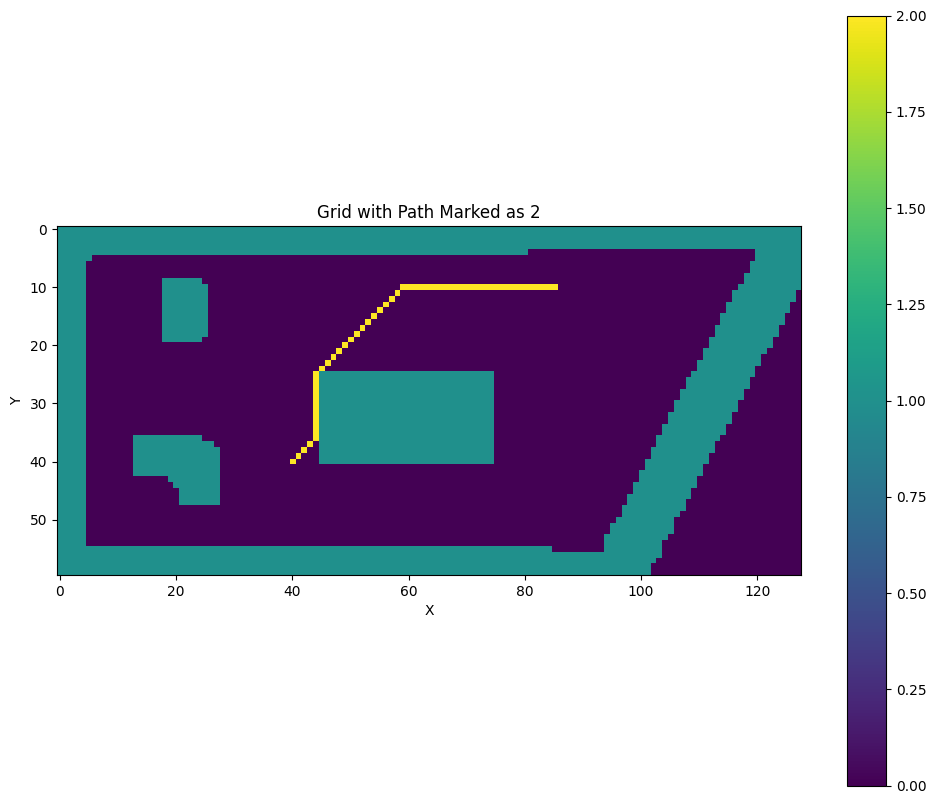

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Example grid (you should replace `extended_grid` with your actual grid)
# extended_grid = np.zeros((30, 64))  # Replace this with your actual grid

# Define start and end points

start_point = (40, 40)
end_point = (10, 85)

# Call A* to find the path
path = a_star(extended_grid, start_point, end_point)

if path:
    # Convert the path to a NumPy array
    path_array = np.array(path)

    # Mark the path as 2 in the grid
    path_grid = extended_grid.copy()  # Create a copy to preserve the original grid
    for (y, x) in path:  # Note that path coordinates are (y, x)
        path_grid[y, x] = 2

    # Visualize the grid
    plt.figure(figsize=(12, 10))
    plt.imshow(path_grid, cmap='viridis', interpolation='nearest')
    plt.title('Grid with Path Marked as 2')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.colorbar(orientation='vertical')

    plt.show()
    print(path_grid)
    # Save the path array to a file
    np.save('path_grid_test2.npy', path_grid)
    print("Path grid saved to path_grid.npy")
else:
    print("No path found.")


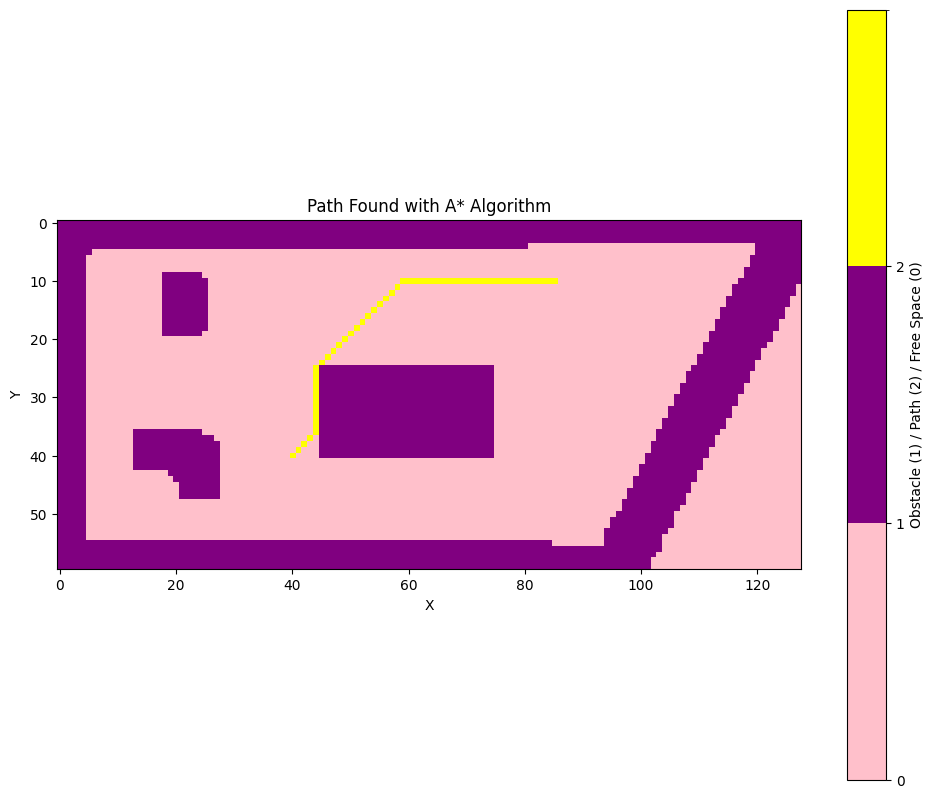

In [57]:
import matplotlib.colors as mcolors

# Create a grid for visualization
path_grid = np.copy(extended_grid)
for x, y in path:
    path_grid[x, y] = 2

cmap = mcolors.ListedColormap(['pink', 'purple', 'yellow'])  # Mapping [0, 1, 2]
bounds = [0, 1, 2, 3]  # Boundaries for the 3 classes
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the merged grid with the path
plt.figure(figsize=(12, 10))
plt.imshow(path_grid, cmap=cmap, norm=norm, interpolation='nearest')
plt.title('Path Found with A* Algorithm')
plt.xlabel('X')
plt.ylabel('Y')

# Adding a colorbar for reference
plt.colorbar(ticks=[0, 1, 2], label='Obstacle (1) / Path (2) / Free Space (0)')
plt.show()